In [231]:
import pandas as pd
import sklearn.model_selection as ms
import sklearn.naive_bayes as nb
import sklearn.metrics as metrics

In [232]:
df = pd.read_csv('train.csv')

In [233]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [234]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [235]:
df["Sex"] = df["Sex"].map({"male":0,"female":1})

In [236]:
df["Embarked"] = df["Embarked"].map({"S":0,"C":1,"Q":2})

In [237]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0
5,6,0,3,0,NaN,0,0,8.4583,2.0
6,7,0,1,0,54.0,0,0,51.8625,0.0
7,8,0,3,0,2.0,3,1,21.0750,0.0
8,9,1,3,1,27.0,0,2,11.1333,0.0
9,10,1,2,1,14.0,1,0,30.0708,1.0


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [239]:
pria = df[df["Sex"] == 0].mean()
 
wanita = df[df["Sex"] == 1].mean()

print(f"pria:  \n{pria} and \nwanita: \n{wanita}")

pria:  
PassengerId    454.147314
Survived         0.188908
Pclass           2.389948
Sex              0.000000
Age             30.726645
SibSp            0.429809
Parch            0.235702
Fare            25.523893
Embarked         0.306759
dtype: float64 and 
wanita: 
PassengerId    431.028662
Survived         0.742038
Pclass           2.159236
Sex              1.000000
Age             27.915709
SibSp            0.694268
Parch            0.649682
Fare            44.479818
Embarked         0.464744
dtype: float64


In [240]:
df["Age"].loc[(df["Sex"] == 0)&(df["Age"].isnull() == True)] = 30.726

C:\Users\wilsen\AppData\Local\Temp\ipykernel_1492\1245666816.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Age"].loc[(df["Sex"] == 0)&(df["Age"].isnull() == True)] = 30.726
C:\Users\wilsen\AppData\Local\Temp\ipykernel_1492\12456668

In [241]:
df["Age"].loc[(df["Sex"] == 1)&(df["Age"].isnull() == True)] =  27.915

C:\Users\wilsen\AppData\Local\Temp\ipykernel_1492\2342750296.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Age"].loc[(df["Sex"] == 1)&(df["Age"].isnull() == True)] =  27.915
C:\Users\wilsen\AppData\Local\Temp\ipykernel_1492\2342750

In [242]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [243]:
df = df.dropna()

In [244]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000,1,0,7.2500,0.0
1,2,1,1,1,38.000,1,0,71.2833,1.0
2,3,1,3,1,26.000,0,0,7.9250,0.0
3,4,1,1,1,35.000,1,0,53.1000,0.0
4,5,0,3,0,35.000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000,0,0,13.0000,0.0
887,888,1,1,1,19.000,0,0,30.0000,0.0
888,889,0,3,1,27.915,1,2,23.4500,0.0
889,890,1,1,0,26.000,0,0,30.0000,1.0


<Axes: >

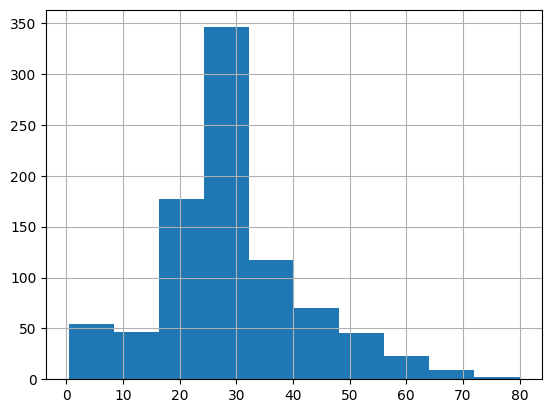

In [245]:
df["Age"].hist(bins=10)

In [246]:
df["Age"]

0      22.000
1      38.000
2      26.000
3      35.000
4      35.000
        ...  
886    27.000
887    19.000
888    27.915
889    26.000
890    32.000
Name: Age, Length: 889, dtype: float64

<Axes: >

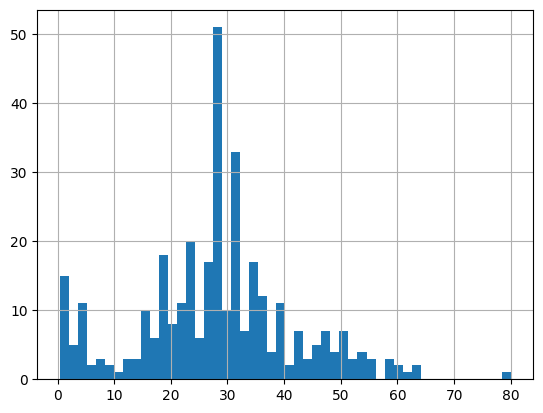

In [247]:
df["Age"].loc[df["Survived"] == 1].hist(bins = 50)

In [248]:
# First list with numbers
umur = [0, 5, 15, 25, 30, 35, 45, 50, 200]

# Second list with strings
label_umur = ["0-5", "5-15", "15-25", "25-30", "30-35", "35-45","45-50" ,">50"]


In [249]:
kelompok_umur = pd.cut(df["Age"], umur, labels=label_umur)

In [250]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000,1,0,7.2500,0.0
1,2,1,1,1,38.000,1,0,71.2833,1.0
2,3,1,3,1,26.000,0,0,7.9250,0.0
3,4,1,1,1,35.000,1,0,53.1000,0.0
4,5,0,3,0,35.000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000,0,0,13.0000,0.0
887,888,1,1,1,19.000,0,0,30.0000,0.0
888,889,0,3,1,27.915,1,2,23.4500,0.0
889,890,1,1,0,26.000,0,0,30.0000,1.0


In [251]:
df["KelompokUmur"] = kelompok_umur

In [252]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,KelompokUmur
0,1,0,3,0,22.000,1,0,7.2500,0.0,15-25
1,2,1,1,1,38.000,1,0,71.2833,1.0,35-45
2,3,1,3,1,26.000,0,0,7.9250,0.0,25-30
3,4,1,1,1,35.000,1,0,53.1000,0.0,30-35
4,5,0,3,0,35.000,0,0,8.0500,0.0,30-35
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000,0,0,13.0000,0.0,25-30
887,888,1,1,1,19.000,0,0,30.0000,0.0,15-25
888,889,0,3,1,27.915,1,2,23.4500,0.0,25-30
889,890,1,1,0,26.000,0,0,30.0000,1.0,25-30


In [253]:
df["KelompokUmurCode"] = df["KelompokUmur"].cat.codes

In [254]:
df["KelompokUmur"].value_counts()

KelompokUmur
15-25    218
30-35    212
25-30    161
35-45    113
>50       63
0-5       44
5-15      39
45-50     39
Name: count, dtype: int64

<Axes: >

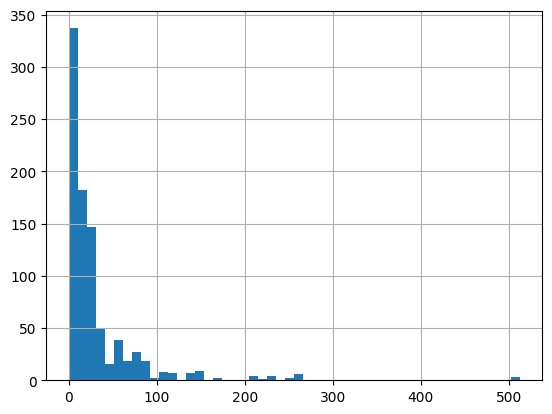

In [255]:
df["Fare"].hist(bins=50)

In [264]:
harga = [-1, 10, 30, 35, 80, 10000]
label_harga = ["0-10", "10-30", "30-35", "35-80", ">80"]

kelompok_harga = pd.cut(df["Fare"], harga, labels=label_harga)
df["KelompokHarga"] = kelompok_harga
df["KelompokHargaCode"] = df["KelompokHarga"].cat.codes

In [265]:
jumlahOrang = df["SibSp"].astype(int) + df["Parch"].astype(int) + 1
df["JumlahOrang"] = jumlahOrang

In [266]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,KelompokUmur,KelompokUmurCode,KelompokHarga,KelompokHargaCode,JumlahOrang
0,1,0,3,0,22.000,1,0,7.2500,0.0,15-25,2,0-10,0,2
1,2,1,1,1,38.000,1,0,71.2833,1.0,35-45,5,35-80,3,2
2,3,1,3,1,26.000,0,0,7.9250,0.0,25-30,3,0-10,0,1
3,4,1,1,1,35.000,1,0,53.1000,0.0,30-35,4,35-80,3,2
4,5,0,3,0,35.000,0,0,8.0500,0.0,30-35,4,0-10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000,0,0,13.0000,0.0,25-30,3,10-30,1,1
887,888,1,1,1,19.000,0,0,30.0000,0.0,15-25,2,10-30,1,1
888,889,0,3,1,27.915,1,2,23.4500,0.0,25-30,3,10-30,1,4
889,890,1,1,0,26.000,0,0,30.0000,1.0,25-30,3,10-30,1,1


In [267]:
display(df.loc[(df["KelompokHarga"].isnull() == True)])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,KelompokUmur,KelompokUmurCode,KelompokHarga,KelompokHargaCode,JumlahOrang


In [268]:
df.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Fare                 0
Embarked             0
KelompokUmur         0
KelompokUmurCode     0
KelompokHarga        0
KelompokHargaCode    0
JumlahOrang          0
dtype: int64

In [269]:
import sklearn.model_selection as ms
x = df[["Pclass", "Embarked", "Sex", "KelompokUmurCode", "KelompokHargaCode", "JumlahOrang"]]
y = df["Survived"]

X_train,x_test,y_train,y_test = ms.train_test_split(x,y,test_size=0.25,random_state=42)

In [270]:
gnb = nb.GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(x_test)


In [271]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy} and \nPrecision: {precision}")

Accuracy: 0.7892376681614349 and 
Precision: 0.6804123711340206


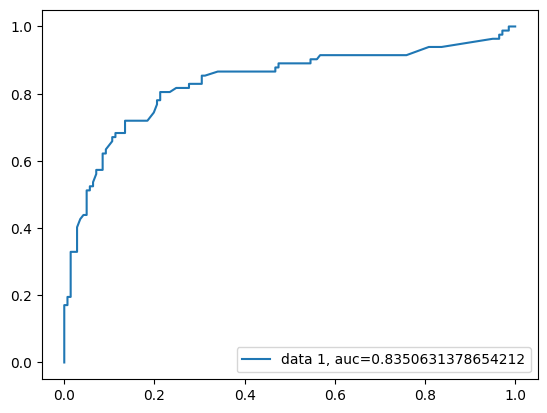

In [273]:
import matplotlib.pyplot as plt
y_pred_proba = gnb.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)